In [114]:
 
"""
> Author:
> Date Modified: 15th,December,2020
 
"""
 
#importing the libraries
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import json

In [115]:
#Loading the json file
path = 'weatherstation.json'
with open(path,'r') as data:
  data = pd.read_json(path)

In [116]:
data

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature
0,2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1
1,2018-09-01 00:05:00,0.1,NaN,NaN,NaN,NaN,NaN
2,2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
3,2018-09-01 00:15:00,0.0,NaN,NaN,NaN,NaN,NaN
4,2018-09-01 00:20:00,0.0,95.2,0.0,598.9,1016.5,16.1
...,...,...,...,...,...,...,...
26170,2018-11-30 22:40:00,0.0,92.8,0.0,0.0,1020.8,-0.7
26171,2018-11-30 22:45:00,0.0,NaN,NaN,NaN,NaN,NaN
26172,2018-11-30 22:50:00,0.0,93.0,0.0,0.0,1020.9,-0.7
26173,2018-11-30 22:55:00,0.0,NaN,NaN,NaN,NaN,NaN


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
timestamp        26175 non-null datetime64[ns]
precipitation    26162 non-null float64
humidity         13085 non-null float64
radiation        13085 non-null float64
sunshine         13083 non-null float64
pressure         13085 non-null float64
temperature      13059 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [118]:
#Counting the numbers of missing values
data.isnull().sum()

timestamp            0
precipitation       13
humidity         13090
radiation        13090
sunshine         13092
pressure         13090
temperature      13116
dtype: int64

In [119]:
#filling missing value with ffill beause it is a a timestamp data
weather_stat= data.fillna(method='ffill')

In [120]:
weather_stat.isnull().sum()

timestamp        0
precipitation    0
humidity         0
radiation        0
sunshine         0
pressure         0
temperature      0
dtype: int64

In [121]:
weather_stat.describe()

,precipitation,humidity,radiation,sunshine,pressure,temperature
count,26175.000000,26175.000000,26175.000000,26175.000000,26175.000000,26175.000000
mean,0.008218,73.785631,118.835855,187.386850,1019.188218,14.063278
std,0.057780,20.230860,201.185976,273.885335,6.714622,6.606198
min,0.000000,8.900000,0.000000,0.000000,989.500000,-1.800000
25%,0.000000,57.500000,0.000000,0.000000,1016.000000,9.800000
50%,0.000000,78.900000,0.000000,0.000000,1019.700000,13.400000
75%,0.000000,91.300000,161.550000,598.900000,1023.300000,18.900000
max,2.700000,100.100000,928.000000,600.000000,1039.800000,30.400000


In [122]:
weather_stat.shape

(26175, 7)

In [123]:
#checking for oulier in our data using the Z score
data_zscore = weather_stat.drop(['timestamp'],axis = 1)

In [124]:
timestamp = weather_stat['timestamp']

In [125]:
from scipy import stats
Z =np.abs(stats.zscore(data_zscore))
print(Z)

[[0.14222803 1.07829256 0.59068792 1.50362566 0.43014676 0.30831061]
 [1.58851051 1.07829256 0.59068792 1.50362566 0.43014676 0.30831061]
 [0.14222803 1.07334952 0.59068792 1.50654664 0.4152536  0.30831061]
 ...
 [0.14222803 0.94977357 0.59068792 0.684193   0.25493839 2.23480429]
 [0.14222803 0.94977357 0.59068792 0.684193   0.25493839 2.23480429]
 [0.14222803 0.92011534 0.59068792 0.684193   0.26983154 2.23480429]]


In [126]:
data_outlier = weather_stat[(Z<3).all(axis=1)]
data_outlier.shape

(25194, 7)

In [127]:
Q1= weather_stat.quantile(0.25)
Q3 = weather_stat.quantile(0.75)
IQR = Q3-Q1
print(IQR)

precipitation      0.00
humidity          33.80
radiation        161.55
sunshine         598.90
pressure           7.30
temperature        9.10
dtype: float64


In [128]:
weather_stat_outlier = data_zscore[~(( data_zscore < (Q1-1.5*IQR)) |
    ( data_zscore > (Q3 + 1.5 * IQR))).any (axis=1)]

print(f'\nIQR-shape: {weather_stat_outlier}')


IQR-shape:        precipitation  humidity  radiation  sunshine  pressure  temperature
0                0.0      95.6        0.0     599.2    1016.3         16.1
2                0.0      95.5        0.0     600.0    1016.4         16.1
3                0.0      95.5        0.0     600.0    1016.4         16.1
4                0.0      95.2        0.0     598.9    1016.5         16.1
5                0.0      95.2        0.0     598.9    1016.5         16.1
...              ...       ...        ...       ...       ...          ...
26170            0.0      92.8        0.0       0.0    1020.8         -0.7
26171            0.0      92.8        0.0       0.0    1020.8         -0.7
26172            0.0      93.0        0.0       0.0    1020.9         -0.7
26173            0.0      93.0        0.0       0.0    1020.9         -0.7
26174            0.0      92.4        0.0       0.0    1021.0         -0.7

[20903 rows x 6 columns]


In [129]:
weather = pd.merge(weather_stat,weather_stat_outlier)
weather

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature
0,2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1
1,2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
2,2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
3,2018-09-01 00:15:00,0.0,95.5,0.0,600.0,1016.4,16.1
4,2018-09-01 00:15:00,0.0,95.5,0.0,600.0,1016.4,16.1
...,...,...,...,...,...,...,...
42746,2018-11-30 22:50:00,0.0,93.0,0.0,0.0,1020.9,-0.7
42747,2018-11-30 22:50:00,0.0,93.0,0.0,0.0,1020.9,-0.7
42748,2018-11-30 22:55:00,0.0,93.0,0.0,0.0,1020.9,-0.7
42749,2018-11-30 22:55:00,0.0,93.0,0.0,0.0,1020.9,-0.7


In [130]:
data_nov = pd.read_csv('wind_data_nov.csv')

In [131]:
data_nov.head()

,timestamp,wind_speed,wind_direction
0,2018-11-01 00:00:00,3.058733,300.820000
1,2018-11-01 00:15:00,4.493533,308.893333
2,2018-11-01 00:30:00,4.796067,322.640000
3,2018-11-01 00:45:00,3.894267,306.646667
4,2018-11-01 01:00:00,4.916467,315.213333


In [132]:
data_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 3 columns):
timestamp         2880 non-null object
wind_speed        2880 non-null float64
wind_direction    2880 non-null float64
dtypes: float64(2), object(1)
memory usage: 67.6+ KB


In [133]:
data_nov.isnull().sum()

timestamp         0
wind_speed        0
wind_direction    0
dtype: int64

In [134]:
data_oct =pd.read_csv('wind_data_oct.csv')

In [135]:
data_oct.head()

,timestamp,wind_speed,wind_direction
0,2018-10-01 00:00:00,3.277333,307.446667
1,2018-10-01 00:15:00,3.657733,292.816667
2,2018-10-01 00:30:00,3.689933,307.526667
3,2018-10-01 00:45:00,3.357267,310.600000
4,2018-10-01 01:00:00,3.362133,314.113333


In [136]:
data_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 3 columns):
timestamp         2976 non-null object
wind_speed        2784 non-null float64
wind_direction    2784 non-null float64
dtypes: float64(2), object(1)
memory usage: 69.9+ KB


In [137]:
data_oct.isnull().sum()

timestamp           0
wind_speed        192
wind_direction    192
dtype: int64

In [138]:
data_oct.sort_values( by= 'wind_speed',ascending = False)

,timestamp,wind_speed,wind_direction
903,2018-10-10 09:45:00,15.777333,295.073333
629,2018-10-07 13:15:00,15.129333,277.153333
899,2018-10-10 08:45:00,14.967867,301.493333
1507,2018-10-16 16:45:00,14.894667,257.440000
904,2018-10-10 10:00:00,14.504667,311.106667
...,...,...,...
2587,2018-10-27 23:00:00,NaN,NaN
2588,2018-10-27 23:15:00,NaN,NaN
2589,2018-10-27 23:30:00,NaN,NaN
2590,2018-10-27 23:45:00,NaN,NaN


In [139]:
data_sep = pd.read_csv('wind_data_sep.csv')

In [140]:
data_sep.head()

,timestamp,wind_speed,wind_direction
0,2018-09-01 00:00:00,4.443333,68.685333
1,2018-09-01 00:15:00,4.122467,71.740667
2,2018-09-01 00:30:00,3.427533,67.434667
3,2018-09-01 00:45:00,3.437867,68.142667
4,2018-09-01 01:00:00,3.688533,69.695333


In [141]:
data_sep.isnull().sum()

timestamp         0
wind_speed        0
wind_direction    0
dtype: int64

In [142]:
#cleaning oct wind data
data_oct = data_oct.fillna(method='ffill')

In [143]:
data_oct.isnull().sum()

timestamp         0
wind_speed        0
wind_direction    0
dtype: int64

In [144]:
wind = data_sep.append([data_oct,data_nov])

In [145]:
wind.describe()

,wind_speed,wind_direction
count,8736.000000,8736.000000
mean,4.269835,198.937346
std,2.450847,88.811740
min,0.081000,20.225667
25%,2.433233,112.515000
50%,3.815633,225.215033
75%,5.617450,278.615000
max,15.777333,343.893333


In [146]:
wind.isnull().sum()

timestamp         0
wind_speed        0
wind_direction    0
dtype: int64

In [147]:
wind['timestamp']=pd.to_datetime(wind.timestamp)

In [148]:
weather_data =pd.merge(weather,wind,on='timestamp')
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14259 entries, 0 to 14258
Data columns (total 9 columns):
timestamp         14259 non-null datetime64[ns]
precipitation     14259 non-null float64
humidity          14259 non-null float64
radiation         14259 non-null float64
sunshine          14259 non-null float64
pressure          14259 non-null float64
temperature       14259 non-null float64
wind_speed        14259 non-null float64
wind_direction    14259 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.1 MB


In [149]:
from pandas import DataFrame
weatherdata = pd.DataFrame.drop_duplicates(weather_data)
weatherdata

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature,wind_speed,wind_direction
0,2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1,4.443333,68.685333
1,2018-09-01 00:15:00,0.0,95.5,0.0,600.0,1016.4,16.1,4.122467,71.740667
3,2018-09-01 00:30:00,0.0,95.1,0.0,600.0,1016.4,16.1,3.427533,67.434667
5,2018-09-01 00:45:00,0.0,95.3,0.0,600.0,1016.3,16.1,3.437867,68.142667
7,2018-09-01 01:00:00,0.0,94.8,0.0,599.0,1016.0,16.0,3.688533,69.695333
...,...,...,...,...,...,...,...,...,...
14250,2018-11-30 22:00:00,0.0,90.3,0.0,0.0,1020.6,-0.1,1.549467,276.306667
14252,2018-11-30 22:15:00,0.0,91.6,0.0,0.0,1020.6,-0.4,1.605000,266.533333
14254,2018-11-30 22:30:00,0.0,92.4,0.0,0.0,1020.7,-0.5,1.837000,268.946667
14256,2018-11-30 22:45:00,0.0,92.8,0.0,0.0,1020.8,-0.7,1.710600,274.213333


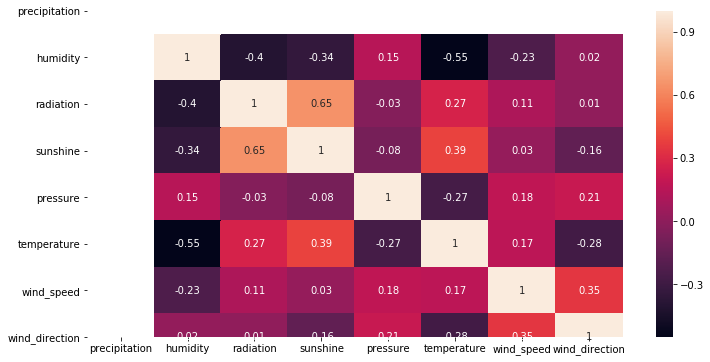

In [150]:
import seaborn as sns
colleration_matrix = weatherdata.corr().round(2)
fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(data=colleration_matrix, annot =True)

In [151]:
weatherdata.describe()

,precipitation,humidity,radiation,sunshine,pressure,temperature,wind_speed,wind_direction
count,6975.0,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000,6975.000000
mean,0.0,76.678982,54.052975,133.029233,1019.891814,13.151756,4.237548,201.537948
std,0.0,18.669771,102.106684,243.674424,5.325235,6.228181,2.327824,90.389666
min,0.0,9.100000,0.000000,0.000000,1005.100000,-1.800000,0.085533,20.225667
25%,0.0,64.300000,0.000000,0.000000,1016.500000,9.100000,2.509767,112.776667
50%,0.0,81.400000,0.000000,0.000000,1020.100000,12.900000,3.816667,234.293333
75%,0.0,91.900000,52.750000,0.000000,1023.500000,17.600000,5.519533,281.532333
max,0.0,100.100000,403.300000,600.000000,1034.200000,30.000000,14.894667,343.893333


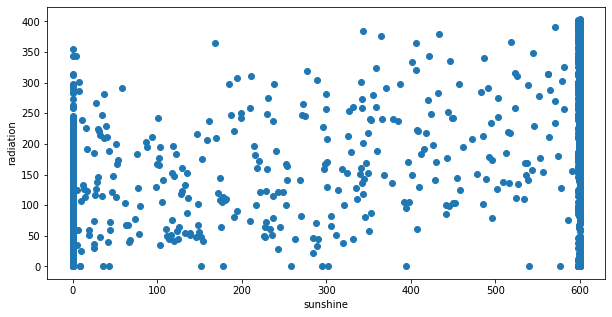

In [152]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(weatherdata['sunshine'] , weatherdata['radiation'])
ax.set_xlabel('sunshine')
ax.set_ylabel('radiation')
plt.show()

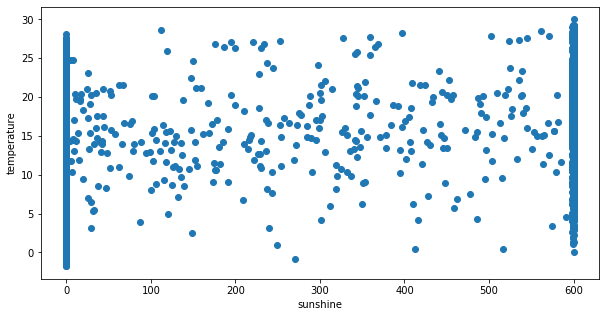

In [153]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(weatherdata['sunshine'] , weatherdata['temperature'])
ax.set_xlabel('sunshine')
ax.set_ylabel('temperature')
plt.show()

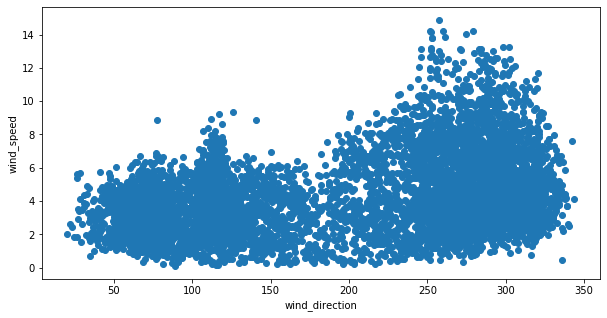

In [154]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(weatherdata['wind_direction'] , weatherdata['wind_speed'])
ax.set_xlabel('wind_direction')
ax.set_ylabel('wind_speed')
plt.show()

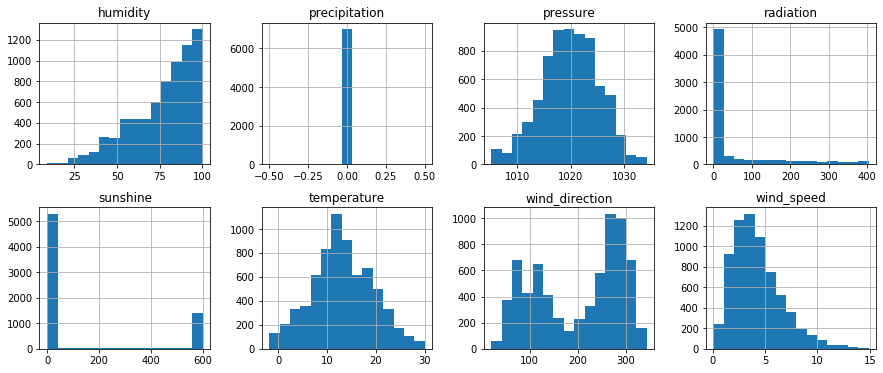

In [155]:
#freqency distrbution
values= ['precipitation','humidity','radiation','sunshine','pressure','temperature','wind_speed','wind_direction']
weatherdata[values].hist(bins=15,  figsize=(15,6),layout=(2,4));

In [157]:
weatherdata.to_csv('New data.csv')